In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creating a time array from 0 to 1 sec with 1000 points
time = np.linspace(0, 1, 1000)

# Simulating normal working condition of the buck converter
# Normal condition: voltage near 5V, current near 1A with slight sine variation
voltage_normal = 7+ 0.1 * np.sin(2 * np.pi * 50 * time)
current_normal = 2 + 0.05 * np.sin(2 * np.pi * 50 * time)

# Fault case 1: short circuit -  voltage drops, current rises
# Voltage is low (around 1V) with random noise & Current goes high (~4A) and is noisy too
voltage_short = 1 + 0.2 * np.random.randn(1000)
current_short = 4 + 0.5 * np.random.randn(1000)

# Fault case 2: Open Load - voltage rises, current drops
#voltage is high (around 9V) & current goes low ,botth with noise
voltage_open = 9 + 0.2 * np.random.randn(1000)
current_open = 0.5 * np.random.randn(1000)

# creating a DataFrame for all conditions to store time, voltage, current, and fault label.
data = pd.DataFrame({
    'time': np.tile(time, 3),
    'voltage': np.concatenate([voltage_normal, voltage_short, voltage_open]),
    'current': np.concatenate([current_normal, current_short, current_open]),
    'label': ['normal'] * 1000 + ['short'] * 1000 + ['open'] * 1000
})

# Previewing the combined data to see voltage, current, and fault labels
print(data.head())


       time   voltage   current   label
0  0.000000  7.000000  2.000000  normal
1  0.001001  7.030932  2.015466  normal
2  0.002002  7.058829  2.029415  normal
3  0.003003  7.080957  2.040479  normal
4  0.004004  7.095144  2.047572  normal


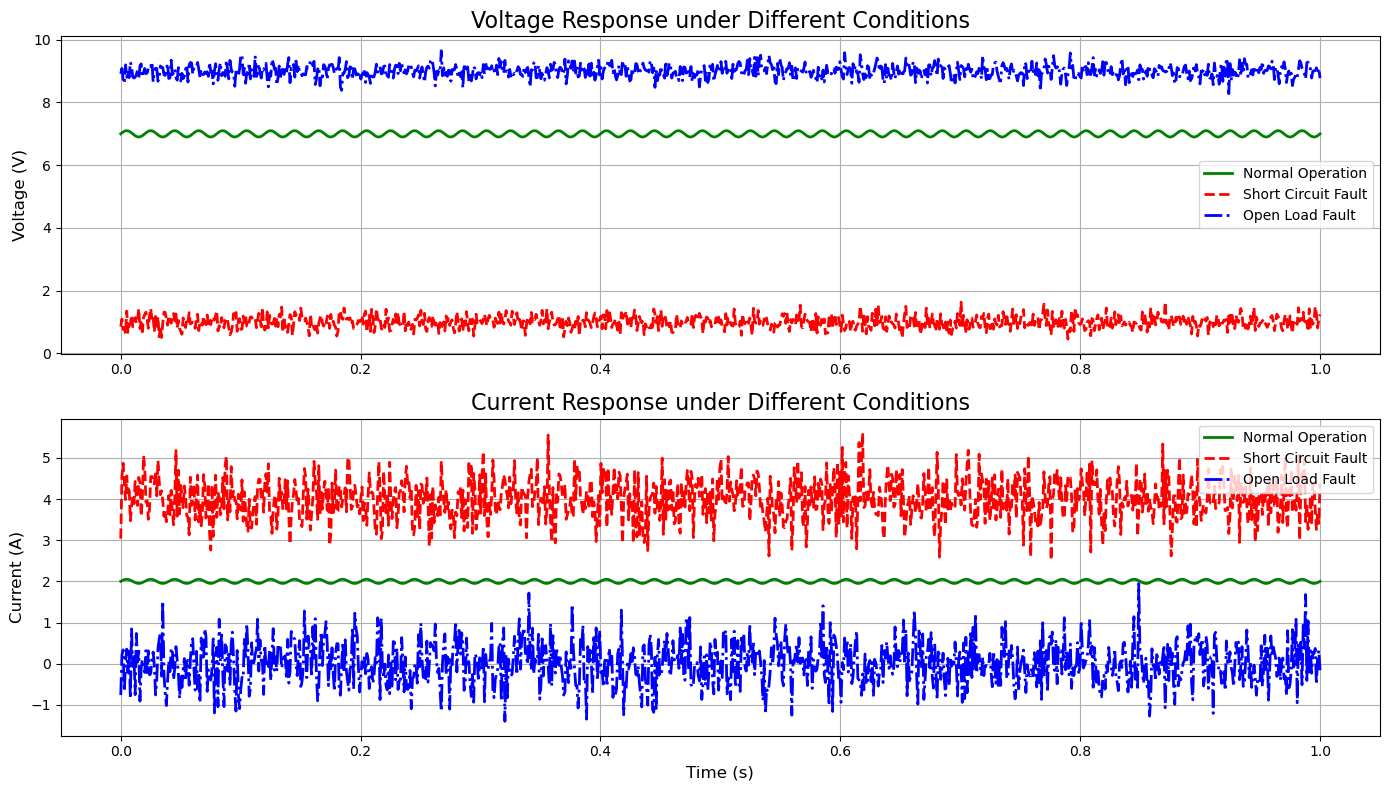

In [12]:
# Separating the data by fault condition to visualize each one clearly.
normal = data[data['label'] == 'normal']
short = data[data['label'] == 'short']
open = data[data['label'] == 'open']

# Creating the plot to visualize voltage and current under different fault conditions
plt.figure(figsize=(14, 8))

# Plotting voltage on the top subplot for all three conditions
plt.subplot(2, 1, 1)
plt.plot(normal['time'], normal['voltage'], color='green', label='Normal Operation', linewidth=2)
plt.plot(short['time'], short['voltage'], color='red', linestyle='--', label='Short Circuit Fault', linewidth=2)
plt.plot(open ['time'], open['voltage'], color='blue', linestyle='-.', label='Open Load Fault', linewidth=2)
plt.title('Voltage Response under Different Conditions', fontsize=16)
plt.ylabel('Voltage (V)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Plotting current on the bottom subplot for all three conditions
plt.subplot(2, 1, 2)
plt.plot(normal['time'], normal['current'], color='green', label='Normal Operation', linewidth=2)
plt.plot(short['time'], short['current'], color='red', linestyle='--', label='Short Circuit Fault', linewidth=2)
plt.plot(open['time'], open['current'], color='blue', linestyle='-.', label='Open Load Fault', linewidth=2)
plt.title('Current Response under Different Conditions', fontsize=16)
plt.ylabel('Current (A)', fontsize=12)
plt.xlabel('Time (s)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Adjusting the layout 
plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Preparing features (X) and labels (y)
X = data[['voltage', 'current']]   # Input features
y = data['label']                  # Output (class: normal, short, open)

# Step 2: Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=45)

# Step 3: Creating and training the model
model = RandomForestClassifier(n_estimators=150, random_state=45)
model.fit(X_train, y_train)

# Step 4: Predicting on test data
y_pred = model.predict(X_test)

# Step 5: Evaluating the model and donee 
print(" #Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n#Classification Report:\n", classification_report(y_test, y_pred))


 #Confusion Matrix:
 [[297   0   0]
 [  0 301   0]
 [  0   0 302]]

#Classification Report:
               precision    recall  f1-score   support

      normal       1.00      1.00      1.00       297
        open       1.00      1.00      1.00       301
       short       1.00      1.00      1.00       302

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



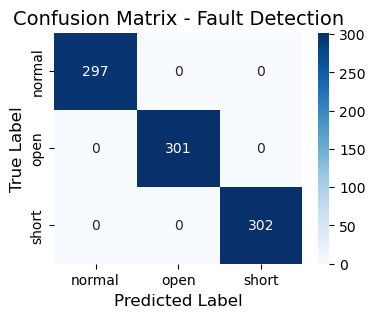

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix to see how well the model classified each fault
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_  # ['normal', 'open', 'short']

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix - Fault Detection', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()


In [23]:
# Example: for normal state
new_voltage = 6.75
new_current = 0.5

# Putting it in the right format
sample = [[new_voltage, new_current]]

# Predictting using the model
prediction = model.predict(sample)
print(f"The converter is in: {prediction[0].upper()} state")


The converter is in: NORMAL state


C:\Users\MANASI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Example: for short ckt state
new_voltage = 1.1
new_current = 4

# Putting it in the right format
sample = [[new_voltage, new_current]]

# Predicting using the model
prediction = model.predict(sample)
print(f" The converter is in: {prediction[0].upper()} state")


 The converter is in: SHORT state


C:\Users\MANASI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Example: for open load state
new_voltage = 5.2
new_current = 1.2

# Putting it in the right format
sample = [[new_voltage, new_current]]

# Predicting using the model
prediction = model.predict(sample)
print(f" The converter is in: {prediction[0].upper()} state")


 The converter is in: NORMAL state


C:\Users\MANASI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import joblib

# Save the model to a file with the help of below command
joblib.dump(model, 'fault_detection_model.pkl')

print("Model saved as 'fault_detection_model.pkl'")


Model saved as 'fault_detection_model.pkl'
